<a href="https://colab.research.google.com/github/priyal6/ML/blob/main/product_re.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import kagglehub


path = kagglehub.dataset_download("skillsmuggler/amazon-ratings")

print("Path to dataset files:", path)

Using Colab cache for faster access to the 'amazon-ratings' dataset.
Path to dataset files: /kaggle/input/amazon-ratings


In [19]:
import os
import pandas as pd

# List the contents of the downloaded directory to find the correct filename
file_list = os.listdir(path)
print("Files in the dataset directory:", file_list)

# Assuming the first file in the list is the correct CSV file
if file_list:
    csv_filename = file_list[0]
    df = pd.read_csv(os.path.join(path, csv_filename))
    print("DataFrame loaded successfully:")
    display(df.head())
else:
    print("No files found in the dataset directory.")

Files in the dataset directory: ['ratings_Beauty.csv']
DataFrame loaded successfully:


,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [20]:
import sklearn
from sklearn.decomposition import TruncatedSVD
import numpy as np


In [21]:
amazon_ratings = df
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [22]:
amazon_ratings = amazon_ratings.dropna()
amazon_ratings.head()

,UserId,ProductId,Rating,Timestamp
0,A39HTATAQ9V7YF,0205616461,5.0,1369699200
1,A3JM6GV9MNOF9X,0558925278,3.0,1355443200
2,A1Z513UWSAAO0F,0558925278,5.0,1404691200
3,A1WMRR494NWEWV,0733001998,4.0,1382572800
4,A3IAAVS479H7M7,0737104473,1.0,1274227200


In [23]:
amazon_ratings.shape

(2023070, 4)

In [24]:
popular_products = pd.DataFrame(amazon_ratings.groupby('ProductId')['Rating'].count())

In [25]:
most_popular = popular_products.sort_values('Rating', ascending=False)
most_popular.head(10)

,Rating
ProductId,
B001MA0QY2,7533
B0009V1YR8,2869
B0043OYFKU,2477
B0000YUXI0,2143
B003V265QW,2088
B000ZMBSPE,2041
B003BQ6QXK,1918
B004OHQR1Q,1885
B00121UVU0,1838


<Axes: xlabel='ProductId'>

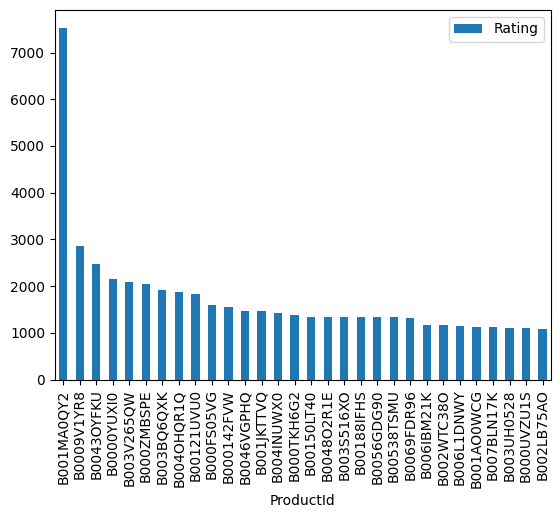

In [26]:
most_popular.head(30).plot(kind='bar')

collaborative filtering system
Recommend items to users based on purchase history and similarity of ratings provided by other users who bought items to that of a particular customer.
A model based collaborative filtering technique is closen here as it helps in making predictinfg products for a particular user by identifying patterns based on preferences from multiple user data.

In [27]:
amazon_ratings1 = amazon_ratings.head(10000)

In [28]:
ratings_utility_matrix = amazon_ratings1.pivot_table(values='Rating', index=
                                                    'UserId', columns='ProductId', fill_value=0)
ratings_utility_matrix.head()

ProductId,0205616461,0558925278,0733001998,0737104473,0762451459,1304139212,1304139220,130414089X,130414643X,1304146537,...,B000052YPE,B000052YPF,B000052YPG,B000052YPH,B000052YPM,B000052YPU,B000052YPV,B000052YPY,B000052YQ0,B000052YQ2
UserId,,,,,,,,,,,,,,,,,,,,,
A00205921JHJK5X9LNP42,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A024581134CV80ZBLIZTZ,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03056581JJIOL5FSKJY7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A03099101ZRK4K607JVHH,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
A0505229A7NSH3FRXRR4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
#transposing the matrix
X = ratings_utility_matrix.T
X.head()

UserId,A00205921JHJK5X9LNP42,A024581134CV80ZBLIZTZ,A03056581JJIOL5FSKJY7,A03099101ZRK4K607JVHH,A0505229A7NSH3FRXRR4,A05492663T95KW63BR75K,A059547920Q3LZVFHLPI3,A07410232KYRFR25CIUGJ,A082796624UNM47DSAI6K,A0864963DOAY7LXGS5I6,...,AZW1HXXYAC15B,AZWRTJPN7NXT,AZWTXHXZXFAYP,AZYQEFB9Y5N22,AZZHB6U54UDYW,AZZHJZP4GQPPZ,AZZNK89PXD006,AZZOFVMQC0BJG,AZZQXL8VDCFTV,AZZTJQ7CQZUD8
ProductId,,,,,,,,,,,,,,,,,,,,,
0205616461,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0558925278,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0733001998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0737104473,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
0762451459,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
X.shape

(886, 9697)

In [31]:
X1 = X

In [32]:
#Decomposing using SVD
SVD = TruncatedSVD(n_components = 10)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(886, 10)

In [33]:
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(886, 886)

In [35]:
X.index[99]  #assuming customer buys product id at index

'6117036094'

In [36]:
i = "6117036094"
product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

99

In [39]:
#Correlation for all items with the item purchased by this customer based on items rated by other customers people who bought the same product
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(886,)

In [40]:
X.index[99]

'6117036094'

In [42]:
Recommend = list(X.index[correlation_product_ID>0.90])

Recommend.remove(i)

Recommend[0:9]

['0205616461',
 '0737104473',
 '1304351475',
 '1304482634',
 '1304622622',
 '322700075X',
 '3292000971',
 '3423470476',
 '4057362797']

Product Id # Here are the top 10 products to be displayed by the recommendation system to the above customer based on the purchase history of other customers in the website.

Recommendation System
For a business without any user-item purchase history, a search engine based recommendation system can be designed for users. The product recommendations can be based on textual clustering analysis given in product description.

In [43]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [54]:
product_descriptions = pd.read_csv('product_descriptions.csv', encoding = "ISO-8859-1", engine='python')
product_descriptions.shape

(124428, 2)

In [55]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_uid,product_description
0,100001,"Not only do angles make joints stronger, they ..."
1,100002,BEHR Premium Textured DECKOVER is an innovativ...
2,100003,Classic architecture meets contemporary design...
3,100004,The Grape Solar 265-Watt Polycrystalline PV So...
4,100005,Update your bathroom with the Delta Vero Singl...


In [58]:
product_descriptions1 = product_descriptions.head(500)

product_descriptions1['product_description'].head(10)

,product_description
0,"Not only do angles make joints stronger, they ..."
1,BEHR Premium Textured DECKOVER is an innovativ...
2,Classic architecture meets contemporary design...
3,The Grape Solar 265-Watt Polycrystalline PV So...
4,Update your bathroom with the Delta Vero Singl...
5,Achieving delicious results is almost effortle...
6,The Quantum Adjustable 2-Light LED Black Emerg...
7,The Teks #10 x 1-1/2 in. Zinc-Plated Steel Was...
8,Get the House of Fara 3/4 in. x 3 in. x 8 ft. ...
9,Valley View Industries Metal Stakes (4-Pack) a...


In [59]:
#Converting the text in
#product description into numerical data for analysis

vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions1['product_description'])
X1

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34817 stored elements and shape (500, 8932)>

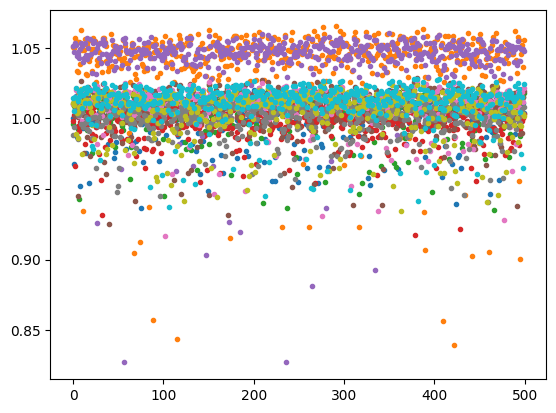

In [62]:
import matplotlib.pyplot as plt

X = X1

kmeans = KMeans(n_clusters = 10, init = 'k-means++')
y_kmeans = kmeans.fit_transform(X)
plt.plot(y_kmeans, ".")
plt.show()

In [64]:
true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

#print_cluster function
def print_cluster(i):
    print(f"Cluster {i}:")
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print()

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names_out()
for i in range(true_k):
    print_cluster(i)

Top terms per cluster:
Cluster 0:
 post
 painted
 hole
 ft
 proposition
 nbsp
 residents
 california
 65
 used

Cluster 1:
 patio
 frame
 fabric
 collection
 rust
 outdoor
 dining
 bronze
 coated
 ft

Cluster 2:
 water
 use
 valve
 handle
 heater
 ball
 brass
 ice
 air
 easy

Cluster 3:
 storage
 shelves
 shelf
 adjustable
 room
 lbs
 finish
 insulation
 drawer
 shelving

Cluster 4:
 light
 power
 watt
 volt
 led
 depot
 ft
 fan
 kit
 plan

Cluster 5:
 toilet
 water
 flush
 piece
 bowl
 design
 helps
 wax
 filter
 high

Cluster 6:
 rug
 vary
 outdoor
 speaker
 slightly
 wall
 patterns
 dimensions
 center
 plate

Cluster 7:
 air
 door
 easy
 ladder
 aluminum
 use
 ft
 window
 attic
 cooling

Cluster 8:
 steel
 cycle
 oven
 cooking
 wash
 ft
 cu
 metal
 steam
 easy

Cluster 9:
 wood
 paint
 natural
 door
 easy
 home
 bamboo
 product
 concrete
 using



In [65]:
def show_recommendations(product):
  Y = vectorizer.transform([product])
  prediction = model.predict(Y)
  print_cluster(prediction[0])

In [68]:
show_recommendations('light')

Cluster 4:
 light
 power
 watt
 volt
 led
 depot
 ft
 fan
 kit
 plan



In [69]:
show_recommendations('metal')

Cluster 8:
 steel
 cycle
 oven
 cooking
 wash
 ft
 cu
 metal
 steam
 easy



cluster is identified based on the user's search words, the recommendation system can display items from the corresponding product clusters based on the product descriptions.